<a href="https://colab.research.google.com/github/federico-700/TP1_spotify_youtube/blob/main/Proyecto_spotify_youtube_parte_1_Doma%C3%B1ski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PROYECTO: SPOTIFY AND YOUTUBE
#Alumnno: Federido Domañski
#Data Science I: Fundamentos para la Ciencia de Datos
#Comision: 61720

"""Este trabajo tiene como objetivo analizar un dataset que contiene datos de Spotify y YouTube con 28 columnas y más de 10,000 registros.
Primero, se realizará una limpieza de datos para identificar y corregir valores nulos o inconsistentes.
Luego, sera el turno del análisis exploratorio (EDA), se calcularán estadísticas descriptivas como media y mediana,
junto con gráficos para comprender la distribución y las relaciones entre variables.
En una segunda fase, se implementará un modelo de machine learning que permita explorar posibles relaciones y patrones en los datos,
abordando tareas como la predicción de visitas en YouTube/Spotify en función de características relevantes
y la clasificación de canciones según su popularidad"""


print("Dataset: Spotify and Youtube(Kaggle)")
print("https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube")



Dataset: Spotify and Youtube(Kaggle)
https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube


In [4]:
print("""
Hipotesis o Preguntas de interes

1))Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y youtube(visualizaciones)?

2)Al analizar la "valencia" de las canciones, que representa su positividad o negatividad,
se observara que existe una mayor cantidad de canciones con alta valencia (positivas,alegres).
Esto sugiere que la distribución de la valencia en las canciones no es normal, sino que está sesgada hacia valores altos de positividad.


3) Las canciones lanzadas como sencillos ("singles") en Spotify tienen, en promedio, más reproducciones o vistas
que aquellas incluidas en álbumes o compilados. Esto se debe a que, al lanzarse de forma individual, los sencillos reciben mayor visibilidad
y atención por parte de los usuarios, lo cual aumenta sus reproducciones en comparación con las canciones agrupadas en un álbum.


Hipótesis futuras:
Existen interrogantes pendientes sobre la relación entre la bailabilidad y el número de reproducciones de las canciones.
o si las personas prefieren bailar canciones alegres, positivas es decir con alta valencia.
Ademas me gustaria, analizar si las personas tienden a comentar más sobre canciones con un tono feliz o triste.
Tambien se podrian abordar aspectos como la relacion entre la  "energía" y la "valencia" de las canciones



Propuestas de Modelos de Machine Learning para la Predicción del Éxito Musical

Para las próxima se entrega, se implementarán modelos de machine learning con los siguientes objetivos principales:

Estimación del Número de Reproducciones (Modelo de regresion)
Se desarrollará un modelo de regresión que permita predecir el número de reproducciones de una canción en Spotify/Youtube.
Este modelo se construirá en función de diversas variables musicales, entre las que se incluyen: energia, valencia, volumen, acustica etc.
Al analizar estas características, el modelo de regresión permitirá estimar el impacto de cada variable en el número de reproducciones,
brindando una proyección sobre la popularidad esperada de la canción.

Clasificación del Potencial de Éxito: Hit o No-Hit (Modelo de clasificacion)
Adicionalmente, se explorará un modelo de clasificación supervisada para categorizar canciones en dos clases: "Hit" (éxito) o "No-Hit" (sin éxito destacado).
Para este modelo, se construirá una nueva variable de clasificación que represente el estado de la canción como "Hit" o "No-Hit",
basándonos en criterios de popularidad (por ejemplo, alcanzar un umbral de reproducciones).
Las mismas variables musicales —energía, valencia, volumen, acústica e instrumentalidad— servirán como predictores para este modelo


""")




Hipotesis o Preguntas de interes

1))Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y youtube(visualizaciones)?

2)Al analizar la "valencia" de las canciones, que representa su positividad o negatividad,
se observara que existe una mayor cantidad de canciones con alta valencia (positivas,alegres).
Esto sugiere que la distribución de la valencia en las canciones no es normal, sino que está sesgada hacia valores altos de positividad.


3) Las canciones lanzadas como sencillos ("singles") en Spotify tienen, en promedio, más reproducciones o vistas
que aquellas incluidas en álbumes o compilados. Esto se debe a que, al lanzarse de forma individual, los sencillos reciben mayor visibilidad
y atención por parte de los usuarios, lo cual aumenta sus reproducciones en comparación con las canciones agrupadas en un álbum.


Hipótesis futuras:
Existen interrogantes pendientes sobre la relación entre la bailabilidad y el número de reproducciones de las cancion

In [5]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from google.colab import files
import io

import matplotlib.pyplot as plt


df = pd.read_csv("Spotify_Youtube.csv")

df.tail()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
8736,8736,Jimmy Eat World,https://open.spotify.com/artist/3Ayl7mCk0nScec...,Place Your Debts,Place Your Debts,single,spotify:track:29f4cPjqBi9n5lS8XQlKa3,0.344,0.458,7.0,...,https://www.youtube.com/watch?v=3_lHvfYwpbU,Jimmy Eat World - Place Your Debts (Official V...,Jimmy Eat World,127870.0,4619.0,488.0,The new song from Jimmy Eat World is out now: ...,False,True,1023048.0
8737,8737,Manuel Carrasco,https://open.spotify.com/artist/7qAoXV4U0qDxQA...,Qué Bonito Es Querer,La Cruz Del Mapa,album,spotify:track:6uzGmmQ4CuG9HvZktEy0LF,0.609,0.718,11.0,...,https://www.youtube.com/watch?v=jqDEKHwpOJ0,Manuel Carrasco - Qué Bonito Es Querer (Video ...,ManuelCarrascoVEVO,62255620.0,284660.0,5550.0,Canción incluida en el álbum 'La Cruz Del Mapa...,True,True,79412936.0
8738,8738,Manuel Carrasco,https://open.spotify.com/artist/7qAoXV4U0qDxQA...,Uno X Uno,Bailar El Viento,album,spotify:track:75K7Mczlt0zxANo8MEOaAu,0.602,0.681,1.0,...,https://www.youtube.com/watch?v=Vj1190w58UM,Manuel Carrasco - Uno X Uno,ManuelCarrascoVEVO,54247539.0,212251.0,5340.0,UNO X UNO ya disponible aquí: https://umusices...,True,True,73935823.0
8739,8739,Manuel Carrasco,https://open.spotify.com/artist/7qAoXV4U0qDxQA...,Hay Que Vivir El Momento,Corazón Y Flecha,album,spotify:track:1QB4PhoYBGDwDoZ7xl5MaI,0.557,0.844,8.0,...,https://www.youtube.com/watch?v=oEHf0gDu8SU,Manuel Carrasco - Hay Que Vivir El Momento,ManuelCarrascoVEVO,5699994.0,41791.0,1105.0,"Hay Que Vivir El Momento, ya disponible para d...",True,True,8962050.0
8740,8740,Manuel Carrasco,https://open.spotify.com/artist/7qAoXV4U0qDxQA...,Eres,Corazón Y Flecha,album,spotify:track:6o5po5Qd3eiCv5IZpVp8zD,0.619,0.815,10.0,...,https://www.youtube.com/watch?v=-aBK5maMdZo,Manuel Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Renombramos las columnas, del ingles al español


df=df.rename(columns={'Unnamed: 0': 'id','Artist':'artista','Track':'cancion','Danceability':'bailabilidad','Energy':'energia','Key':'tonalidad','Loudness':'volumen','Speechiness':'hablabilidad','Acousticness':'acustica','Instrumentalness':'instrumental','Liveness':'vivencia','Valence':'valencia','Tempo':'tiempo','Duration_ms':'duracion','Title':'titulo_youtube','Channel':'canal','Views':'vistas','Likes':'likes','Comments':'comentarios','Description':'descripcion_youtube','Licensed':'licencia','Stream':'reproducciones_spotify','Album_type':'album_type'})
df.columns

Index(['id', 'artista', 'Url_spotify', 'cancion', 'Album', 'album_type', 'Uri',
       'bailabilidad', 'energia', 'tonalidad', 'volumen', 'hablabilidad',
       'acustica', 'instrumental', 'vivencia', 'valencia', 'tiempo',
       'duracion', 'Url_youtube', 'titulo_youtube', 'canal', 'vistas', 'likes',
       'comentarios', 'descripcion_youtube', 'licencia', 'official_video',
       'reproducciones_spotify'],
      dtype='object')

In [7]:
"""
Descripcion de las variables

Cancion: nombre de la canción, tal como se ve en la plataforma Spotify.
Artista: nombre del artista.
Url_spotify: la URL del artista.
Album: el álbum en el que se encuentra la canción en Spotify.
Album_type: indica si la canción se lanzó en Spotify como single o está contenida en un álbum.
Uri: un enlace de Spotify que se utiliza para encontrar la canción a través de la API.
Bailabilidad: describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del pulso y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.
Energia: es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.
Tonalidad: la tonalidad en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna tonalidad, el valor es -1.
Volumen: el volumen general de una pista en decibeles (dB). Los valores de volumen se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la calidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.
Hablabilidad: detecta la presencia de palabras habladas en una pista. Cuanto más parecida a un habla sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más cerca de 1.0 estará el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente estén compuestas completamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como diálogo, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores inferiores a 0,33 probablemente representan música y otras pistas que no son de diálogo.
Acustica: una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una alta confianza de que la pista es acústica.
Instrumentalidad: predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.
Vivencia: detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en vivo.
Valencia:una medida de 0,0 a 1,0 que describe la positividad musical transmitida por una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).
Tempo: tempo general estimado de una canción en pulsaciones por minuto (PPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de las pulsaciones.
Duración: duración de la canción en milisegundos.
Reproducciones_spotify: número de reproducciones de la canción en Spotify.
Url_youtube: url del vídeo enlazado a la canción en Youtube, si lo hay.
Título: título del videoclip en Youtube.
Canal: nombre del canal que ha publicado el vídeo.
Vistas: número de visualizaciones.
Likes: número de me gusta.
Comentarios: número de comentarios.
Descripción_youtube: descripción del vídeo en Youtube.
Licencia: indica si el video representa contenido con licencia, lo que significa que el contenido se cargó en un canal vinculado a un socio de contenido de YouTube y luego fue reclamado por ese socio.
Official_video: valor booleano que indica si el video encontrado es el video oficial de la canción."""


'\nDescripcion de las variables\n\nCancion: nombre de la canción, tal como se ve en la plataforma Spotify.\nArtista: nombre del artista.\nUrl_spotify: la URL del artista.\nAlbum: el álbum en el que se encuentra la canción en Spotify.\nAlbum_type: indica si la canción se lanzó en Spotify como single o está contenida en un álbum.\nUri: un enlace de Spotify que se utiliza para encontrar la canción a través de la API.\nBailabilidad: describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen tempo, estabilidad del ritmo, fuerza del pulso y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.\nEnergia: es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características per

In [8]:
df.shape


(8741, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8741 non-null   int64  
 1   artista                 8741 non-null   object 
 2   Url_spotify             8741 non-null   object 
 3   cancion                 8741 non-null   object 
 4   Album                   8741 non-null   object 
 5   album_type              8741 non-null   object 
 6   Uri                     8741 non-null   object 
 7   bailabilidad            8741 non-null   float64
 8   energia                 8741 non-null   float64
 9   tonalidad               8741 non-null   float64
 10  volumen                 8741 non-null   float64
 11  hablabilidad            8741 non-null   float64
 12  acustica                8741 non-null   float64
 13  instrumental            8741 non-null   float64
 14  vivencia                8741 non-null   

In [10]:
#Se ha procedido a una depuración del conjunto de datos, eliminando variables que no contribuyen significativamente al modelo, como es el caso de 'url_spotify'.
#Se va hacer un nuevo dataset con las variables mas relevantes, llamado df_reducido

df_reducido =df[['id','artista','cancion','album_type','bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','likes','comentarios','reproducciones_spotify']]
df_reducido.tail()


,id,artista,cancion,album_type,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
8736,8736,Jimmy Eat World,Place Your Debts,single,0.344,0.458,7.0,-6.649,0.0285,0.00343,0.158,0.0747,0.0647,87.959,310381.0,127870.0,4619.0,488.0,1023048.0
8737,8737,Manuel Carrasco,Qué Bonito Es Querer,album,0.609,0.718,11.0,-7.177,0.0450,0.60000,0.000,0.0820,0.4260,93.940,270188.0,62255620.0,284660.0,5550.0,79412936.0
8738,8738,Manuel Carrasco,Uno X Uno,album,0.602,0.681,1.0,-6.976,0.0517,0.46800,0.000,0.0680,0.5050,89.923,229720.0,54247539.0,212251.0,5340.0,73935823.0
8739,8739,Manuel Carrasco,Hay Que Vivir El Momento,album,0.557,0.844,8.0,-3.632,0.0886,0.01900,0.000,0.3150,0.6570,101.051,241367.0,5699994.0,41791.0,1105.0,8962050.0
8740,8740,Manuel Carrasco,Eres,album,0.619,0.815,10.0,-4.527,0.1520,0.07350,0.000,0.3480,0.9310,89.929,228800.0,NaN,NaN,NaN,NaN


In [11]:
df_reducido.shape

(8741, 19)

In [12]:
df_reducido.describe()

,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
count,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.000000,8741.00000,8.741000e+03,8.554000e+03,8.513000e+03,8.507000e+03,8.435000e+03
mean,4370.000000,0.591346,0.614804,5.206498,-8.807260,0.084614,0.316070,0.074016,0.197446,0.548285,119.13750,2.405647e+05,7.334484e+07,4.340975e+05,1.625978e+04,1.066713e+08
std,2523.453685,0.173602,0.237061,3.548459,5.442649,0.110399,0.305975,0.222184,0.175838,0.254015,29.73988,1.348518e+05,2.298015e+08,1.357531e+06,8.738986e+04,1.840917e+08
min,0.000000,0.000000,0.001940,0.000000,-44.761000,0.000000,0.000002,0.000000,0.015700,0.000000,0.00000,4.846600e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,2185.000000,0.481000,0.467000,2.000000,-10.492000,0.033600,0.045200,0.000000,0.091400,0.351000,95.81300,1.908000e+05,1.311680e+06,1.325400e+04,3.450000e+02,1.601027e+07
50%,4370.000000,0.608000,0.652000,5.000000,-7.339000,0.044000,0.210000,0.000011,0.126000,0.566000,117.01900,2.292670e+05,1.133621e+07,8.066200e+04,2.519000e+03,4.238122e+07
75%,6555.000000,0.718000,0.800000,8.000000,-5.413000,0.079400,0.536000,0.001570,0.248000,0.756000,137.27400,2.725870e+05,5.421075e+07,3.322240e+05,1.033150e+04,1.095905e+08
max,8740.000000,0.975000,0.997000,11.000000,-0.140000,0.964000,0.996000,0.988000,1.000000,0.991000,243.37200,4.581483e+06,8.079649e+09,5.078865e+07,4.252791e+06,2.110574e+09


In [13]:
print("\nValores nulos en el conjunto de datos:")
print(df_reducido.isnull().sum())


Valores nulos en el conjunto de datos:
id                          0
artista                     0
cancion                     0
album_type                  0
bailabilidad                0
energia                     0
tonalidad                   0
volumen                     0
hablabilidad                0
acustica                    0
instrumental                0
vivencia                    0
valencia                    0
tiempo                      0
duracion                    0
vistas                    187
likes                     228
comentarios               234
reproducciones_spotify    306
dtype: int64


In [14]:
#Estrategia 1: remover filas faltantes:Los datos faltantes que faltan en bailabilidad son los mismos que faltan
# en energia, tonalidad, volumen, hablabilidad, acustica, instrumental, vivencia, valencia, tiempo y duracion
#como solo son dos filas, estas se van a borrar



df_limpio_1 =df_reducido.dropna(subset=['energia'])
print(df_limpio_1.isnull().sum())


id                          0
artista                     0
cancion                     0
album_type                  0
bailabilidad                0
energia                     0
tonalidad                   0
volumen                     0
hablabilidad                0
acustica                    0
instrumental                0
vivencia                    0
valencia                    0
tiempo                      0
duracion                    0
vistas                    187
likes                     228
comentarios               234
reproducciones_spotify    306
dtype: int64


In [15]:
df_limpio_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8741 non-null   int64  
 1   artista                 8741 non-null   object 
 2   cancion                 8741 non-null   object 
 3   album_type              8741 non-null   object 
 4   bailabilidad            8741 non-null   float64
 5   energia                 8741 non-null   float64
 6   tonalidad               8741 non-null   float64
 7   volumen                 8741 non-null   float64
 8   hablabilidad            8741 non-null   float64
 9   acustica                8741 non-null   float64
 10  instrumental            8741 non-null   float64
 11  vivencia                8741 non-null   float64
 12  valencia                8741 non-null   float64
 13  tiempo                  8741 non-null   float64
 14  duracion                8741 non-null   

In [16]:
#Estrategia 2, para los valorse faltantes en las columnas vistas, likes, comentarios y reproducciones_spotify se va a usar la mediana de cada columna

# Reemplaza los valores nulos con la mediana de cada columna correspondiente
df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
df_limpio_1['likes'].fillna(df_limpio_1['likes'].median(), inplace=True)
df_limpio_1['comentarios'].fillna(df_limpio_1['comentarios'].median(), inplace=True)
df_limpio_1['reproducciones_spotify'].fillna(df_limpio_1['reproducciones_spotify'].median(), inplace=True)


print(df_limpio_1.isnull().sum())





id                        0
artista                   0
cancion                   0
album_type                0
bailabilidad              0
energia                   0
tonalidad                 0
volumen                   0
hablabilidad              0
acustica                  0
instrumental              0
vivencia                  0
valencia                  0
tiempo                    0
duracion                  0
vistas                    0
likes                     0
comentarios               0
reproducciones_spotify    0
dtype: int64


<ipython-input-16-2f842a41e643>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio_1['vistas'].fillna(df_limpio_1['vistas'].median(), inplace=True)
<ipython-input-16-2f842a41e643>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [17]:
#Analisis exploratorio de datos (EDA)
df_limpio_1.describe().round(2)

# Cuando se explicaron el signficado de las columnas se establecio el rango de estas, las mayorias van entre 0 y 1,
#esto tambien se ve en el analisis exploratorio de los datos, en el siguiente cuadro


,id,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,vistas,likes,comentarios,reproducciones_spotify
count,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8741.00,8.741000e+03,8741.00,8741.00,8.741000e+03
mean,4370.00,0.59,0.61,5.21,-8.81,0.08,0.32,0.07,0.20,0.55,119.14,240564.68,7.201826e+07,424878.51,15891.93,1.044207e+08
std,2523.45,0.17,0.24,3.55,5.44,0.11,0.31,0.22,0.18,0.25,29.74,134851.80,2.275068e+08,1340890.88,86240.58,1.812260e+08
min,0.00,0.00,0.00,0.00,-44.76,0.00,0.00,0.00,0.02,0.00,0.00,48466.00,0.000000e+00,0.00,0.00,6.574000e+03
25%,2185.00,0.48,0.47,2.00,-10.49,0.03,0.05,0.00,0.09,0.35,95.81,190800.00,1.396220e+06,14229.00,372.00,1.674250e+07
50%,4370.00,0.61,0.65,5.00,-7.34,0.04,0.21,0.00,0.13,0.57,117.02,229267.00,1.133621e+07,80662.00,2519.00,4.238122e+07
75%,6555.00,0.72,0.80,8.00,-5.41,0.08,0.54,0.00,0.25,0.76,137.27,272587.00,5.227524e+07,321166.00,10001.00,1.050336e+08
max,8740.00,0.98,1.00,11.00,-0.14,0.96,1.00,0.99,1.00,0.99,243.37,4581483.00,8.079649e+09,50788652.00,4252791.00,2.110574e+09


In [18]:
df_limpio_1['artista'] = df_limpio_1['artista'].astype('category')
df_limpio_1['cancion'] = df_limpio_1['cancion'].astype('category')
df_limpio_1['album_type'] = df_limpio_1['album_type'].astype('category')

In [207]:
df_limpio_1.describe(include='category')

,artista,cancion,album_type
count,20716,20716,20716
unique,2079,17839,3
top,$NOT,El Ultimo Adiós - Varios Artistas Version,album
freq,10,24,14924




Hipotesis

1)Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y Youtube(visualizaciones)?




<ipython-input-208-14fb205d15c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['reproducciones_spotify'] = pd.to_numeric(df_limpio_1['reproducciones_spotify'], errors='coerce')
<ipython-input-208-14fb205d15c5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_1['vistas'] = pd.to_numeric(df_limpio_1['vistas'], errors='coerce')



La correlación entre las vistas de YouTube y las reproducciones de Spotify es de aproximadamente 0.6
Este valor representa una correlación positiva moderada entre ambas variables, lo que significa que, en general,
cuando una variable aumenta, la otra tiende a hacerlo también, aunque esta relación no es perfectamente lineal.
A priori pensaba que esta correlación iba a ser más alta.
Es probable que existan otros factores que influyen en el rendimiento de las canciones en cada plataforma,
como la demografía de la audiencia, el marketing, o el tipo de contenido que funciona mejor en cada plataforma


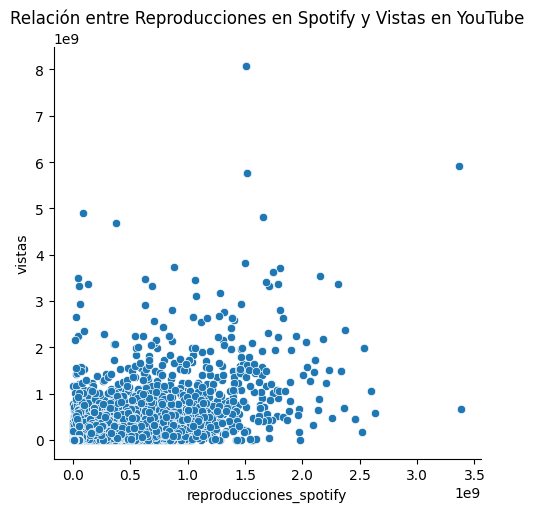

In [208]:
print("""

Hipotesis

1)Existe una correlación entre la popularidad de una canción en Spotify (reproducciones) y Youtube(visualizaciones)?

""")

#Correlacion
df_limpio_1['reproducciones_spotify'] = pd.to_numeric(df_limpio_1['reproducciones_spotify'], errors='coerce')
df_limpio_1['vistas'] = pd.to_numeric(df_limpio_1['vistas'], errors='coerce')
correlacion =df_limpio_1['reproducciones_spotify'].corr(df_limpio_1['vistas'])



#Grafico
g=sns.relplot(data=df_limpio_1, x="reproducciones_spotify", y="vistas", kind='scatter')
# Agregar el título
g.set(title="Relación entre Reproducciones en Spotify y Vistas en YouTube")


print("")
print("La correlación entre las vistas de YouTube y las reproducciones de Spotify es de aproximadamente", round(correlacion, 2))
print("Este valor representa una correlación positiva moderada entre ambas variables, lo que significa que, en general,")
print("cuando una variable aumenta, la otra tiende a hacerlo también, aunque esta relación no es perfectamente lineal.")
print("A priori pensaba que esta correlación iba a ser más alta.")
print("Es probable que existan otros factores que influyen en el rendimiento de las canciones en cada plataforma,")
print("como la demografía de la audiencia, el marketing, o el tipo de contenido que funciona mejor en cada plataforma")








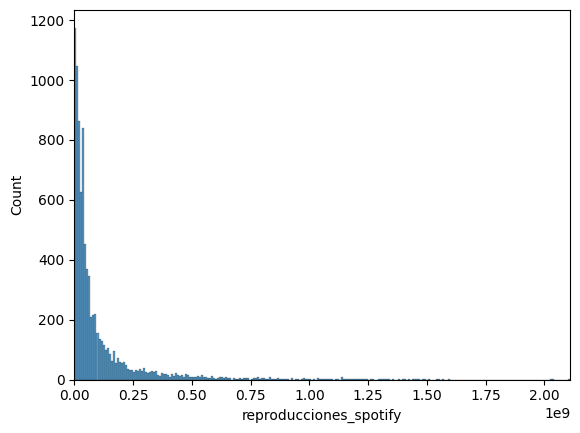

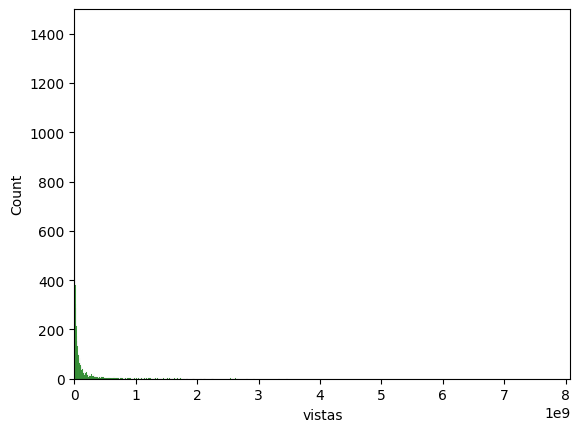


El análisis del gráfico de correlación generó la inquietud sobre la distribución de las reproducciones en YouTube y Spotify.
Inicialmente, se esperaba una distribución normal, donde la mayoría de las canciones tuvieran un número de reproducciones cercano a la media/mediana
y los valores extremos representaran las canciones más populares y menos escuchadas.
Sin embargo, en los histogramas se ve que la mayoría de las canciones presentan muy pocas reproducciones,
sugiriendo una distribución asimétrica, con una concentración de valores bajos y una cola extendida hacia la derecha para las canciones más reproducidas.
Este patrón es común en fenómenos de popularidad, donde solo unas pocas canciones acumulan la mayor parte de las reproducciones.


In [19]:
#Reproducciones Spotify
sns.histplot(data=df_limpio_1, x="reproducciones_spotify")
plt.xlim(0, df_limpio_1["reproducciones_spotify"].max())  # Ajusta 0 como límite inferior
plt.show()



#Reproducciones Youtube
sns.histplot(data=df_limpio_1, x="vistas", color="green")
plt.ylim(0, 1500) #Uso 1500 como límite porque los datos llegan mas o menos hasta 1000
plt.xlim(0, df_limpio_1["vistas"].max())  # Ajusta 0 como límite inferior
plt.show()



print("""
El análisis del gráfico de correlación generó la inquietud sobre la distribución de las reproducciones en YouTube y Spotify.
Inicialmente, se esperaba una distribución normal, donde la mayoría de las canciones tuvieran un número de reproducciones cercano a la media/mediana
y los valores extremos representaran las canciones más populares y menos escuchadas.
Sin embargo, en los histogramas se ve que la mayoría de las canciones presentan muy pocas reproducciones,
sugiriendo una distribución asimétrica, con una concentración de valores bajos y una cola extendida hacia la derecha para las canciones más reproducidas.
Este patrón es común en fenómenos de popularidad, donde solo unas pocas canciones acumulan la mayor parte de las reproducciones.""")










Hipotesis 2) Recien vimos que la La distribucion de las canciones segun sus vistas y reproducciones no sigue una distribucion normal,
la nueva hipotesis es que si se analiza la valencia(positividad o negatividad de una cancion), hay mas canciones "positivas"(valencia alta)
y esto hace que la distribucion no sea normal


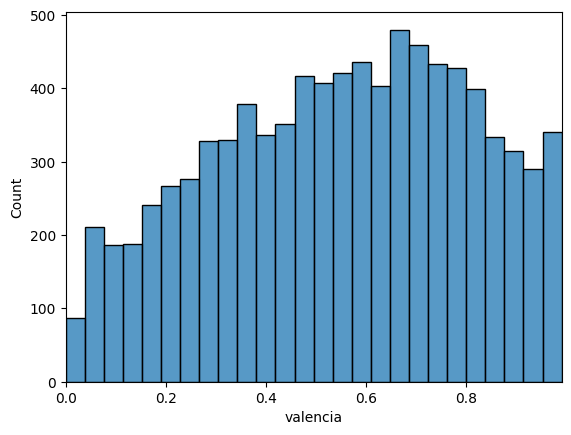

Promedio valencia:  0.548285219082485
Moda valencia:  0    0.961
Name: valencia, dtype: float64
Mediana valencia:  0.566
Test de kolmogorov-Smirnov
Estadístico KS: 0.0509143752957546
p-valor: 3.926555985502326e-20

Conclusion
A pesar de que el valor del estadístico KS es relativamente bajo,
lo que sugiere que los datos se ajustan bien a la distribución normal,
el p-valor extremadamente bajo (1.61e-33) indica que la hipótesis nula de normalidad se rechaza con alta confianza.
Esto significa que los datos no siguen una distribución normal.
La moda tan diferente a la media y a la mediana tambien daba un indicio de esto.

Hay una ligera predominancia de canciones con valencia positiva. La media de valencia es 0.529 y la mediana 0.537,
lo que indica una tendencia hacia valores positivos en una escala de 0.0 a 1.0,
donde puntuaciones más altas reflejan emociones positivas (felicidad, euforia) y
las más bajas emociones negativas (tristeza, enojo).
La moda, ubicada en 0.961, destaca que la mayo

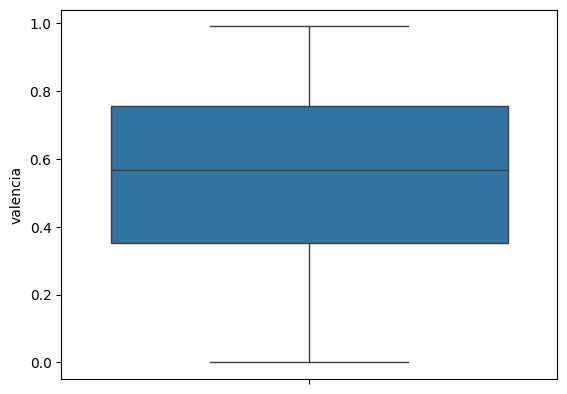

In [20]:
print("""

Hipotesis 2) Recien vimos que la La distribucion de las canciones segun sus vistas y reproducciones no sigue una distribucion normal,
la nueva hipotesis es que si se analiza la valencia(positividad o negatividad de una cancion), hay mas canciones "positivas"(valencia alta)
y esto hace que la distribucion no sea normal""")


#Reproducciones valencia
sns.histplot(data=df_limpio_1, x="valencia")
plt.xlim(0, df_limpio_1["valencia"].max())  # Ajusta 0 como límite inferior
plt.show()


sns.boxplot(data=df_limpio_1, y="valencia")
plt.show





promedio_valencia= df_limpio_1['valencia'].mean()
print("Promedio valencia: ",promedio_valencia)

moda_valencia= df_limpio_1['valencia'].mode()
print("Moda valencia: ",moda_valencia)

mediana_valencia= df_limpio_1['valencia'].median()
print("Mediana valencia: ", mediana_valencia)





#Test para saber si la distribucion es normal, lo busque por internet
from scipy import stats

# Realizar el test de Kolmogorov-Smirnov
stat, p_value = stats.kstest(df_limpio_1['valencia'], 'norm', args=(df_limpio_1['valencia'].mean(), df_limpio_1['valencia'].std()))

print("Test de kolmogorov-Smirnov")
print(f"Estadístico KS: {stat}")
print(f"p-valor: {p_value}")

print("""
Conclusion
A pesar de que el valor del estadístico KS es relativamente bajo,
lo que sugiere que los datos se ajustan bien a la distribución normal,
el p-valor extremadamente bajo (1.61e-33) indica que la hipótesis nula de normalidad se rechaza con alta confianza.
Esto significa que los datos no siguen una distribución normal.
La moda tan diferente a la media y a la mediana tambien daba un indicio de esto.

Hay una ligera predominancia de canciones con valencia positiva. La media de valencia es 0.529 y la mediana 0.537,
lo que indica una tendencia hacia valores positivos en una escala de 0.0 a 1.0,
donde puntuaciones más altas reflejan emociones positivas (felicidad, euforia) y
las más bajas emociones negativas (tristeza, enojo).
La moda, ubicada en 0.961, destaca que la mayor frecuencia de canciones corresponde a aquellas con valencia alta, es decir, predominantemente "positivas".
""" )









Hipotesis 3) Las canciones que aparecen en los albumnes/complilados tienen menos reproducciones/ vistas que las que salen single (en Spotify)
Promedio single reproducciones:  76417736.2599445
Promedio de reproducciones si la cancion si sale un un album:  111068163.32982604
Promedio de reproducciones si la cancion si sale un un compilado:  72255025.37969925


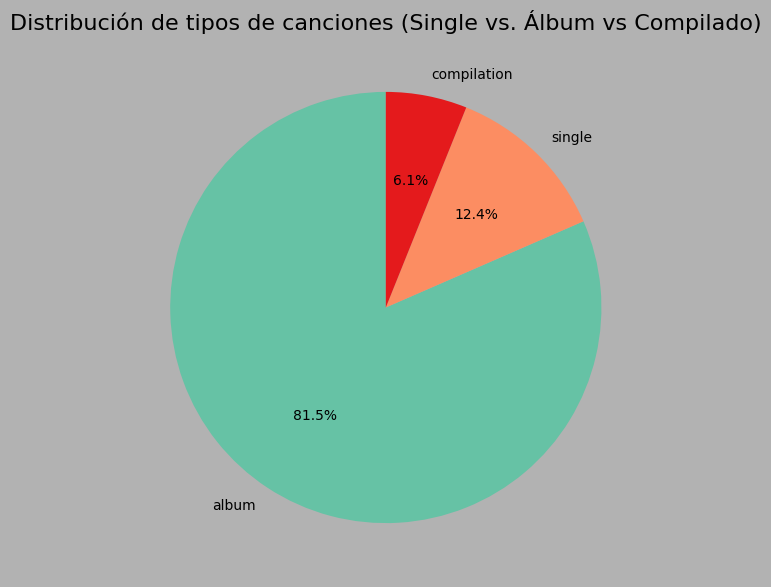


La hipótesis es incorrecta. Las canciones que aparecen en álbumes tienen, en promedio, más reproducciones que las que salen como single.
Mientras que las canciones dentro de compilados son las que tiene menos reproducciones.



In [21]:
print("Hipotesis 3) Las canciones que aparecen en los albumnes/complilados tienen menos reproducciones/ vistas que las que salen single (en Spotify)")


promedio_single= df_limpio_1[df_limpio_1['album_type']=='single']['reproducciones_spotify'].mean()
print("Promedio single reproducciones: ",promedio_single)

promedio_album= df_limpio_1[df_limpio_1['album_type']=='album']['reproducciones_spotify'].mean()
print("Promedio de reproducciones si la cancion si sale un un album: ",promedio_album)

promedio_compilados= df_limpio_1[df_limpio_1['album_type']=='compilation']['reproducciones_spotify'].mean()
print("Promedio de reproducciones si la cancion si sale un un compilado: ",promedio_compilados)



#Contar la cantidad de canciones de cada tipo
conteo_tipos=df_limpio_1['album_type'].value_counts()

#Crear grafico de torta
fig,ax =plt.subplots(figsize = (8,7))
fig.set_facecolor('#b2b2b2')

ax.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62','#e41a1c'])
ax.set_title("Distribución de tipos de canciones (Single vs. Álbum vs Compilado)", fontsize=16)

plt.show()

print("""
La hipótesis es incorrecta. Las canciones que aparecen en álbumes tienen, en promedio, más reproducciones que las que salen como single.
Mientras que las canciones dentro de compilados son las que tiene menos reproducciones.
"""
)



                        bailabilidad   energia  tonalidad   volumen  \
bailabilidad                1.000000  0.334838   0.038268  0.396074   
energia                     0.334838  1.000000   0.032549  0.797710   
tonalidad                   0.038268  0.032549   1.000000  0.015061   
volumen                     0.396074  0.797710   0.015061  1.000000   
hablabilidad                0.198098  0.097702   0.008744  0.051958   
acustica                   -0.357551 -0.708972  -0.042777 -0.605845   
instrumental               -0.375066 -0.387834   0.006654 -0.577566   
vivencia                   -0.056454  0.165956  -0.007266  0.112602   
valencia                    0.555005  0.431357   0.037467  0.343239   
tiempo                     -0.060639  0.164623   0.016941  0.148638   
duracion                   -0.048692  0.040776   0.010844  0.032582   
vistas                      0.082337  0.102334  -0.003157  0.127417   
reproducciones_spotify      0.064195  0.106197  -0.013370  0.135124   
likes 

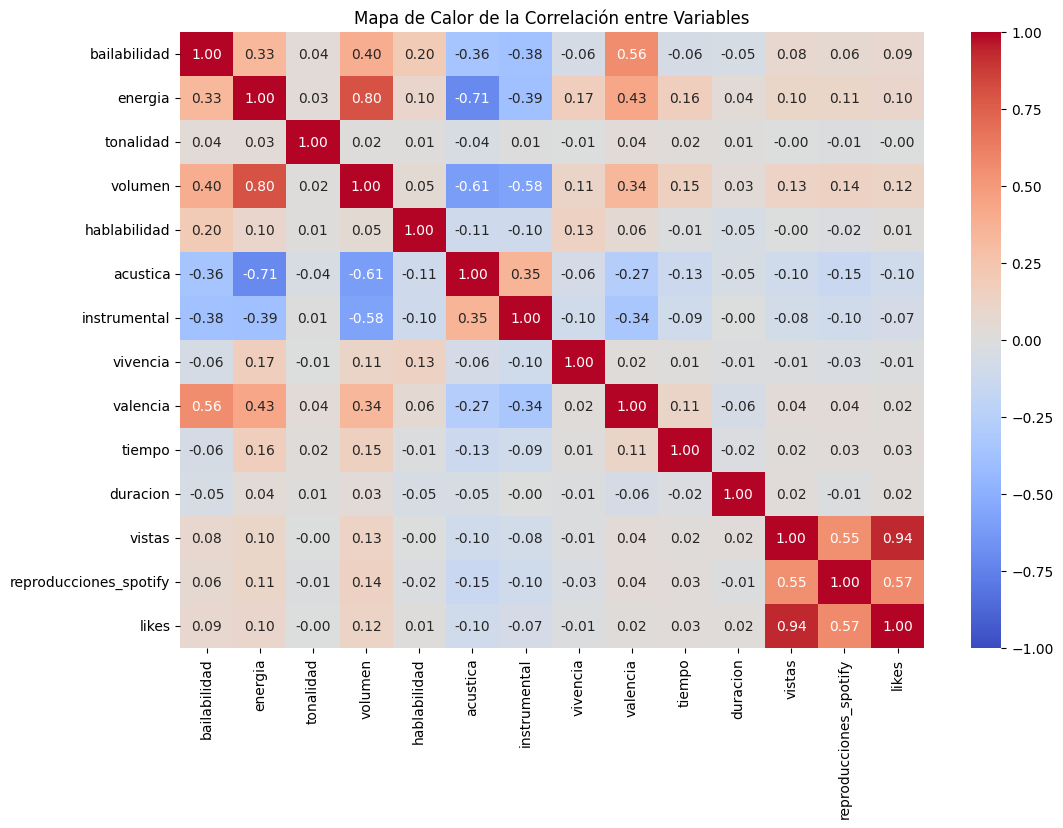

In [22]:
#Analisis pendiente: Correlacion
#hay muchos datos interesantes para ver....pero quedan para la proxima, solo dejo el grafico....esta sera la base para hacer los modelos de regresion o clasificacion

correlacion_total=df_limpio_1[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','vistas','reproducciones_spotify','likes']].corr()
print(correlacion_total)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_total, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()





In [213]:
print("""
MODELO PARTE 1: AGREGAR UNA NUEVA VARIABLE

Agregar una nueva variable. Hit
La idea es convertir una variable numerica(vistas) en una variable  categorica(hit):
"Hit": Si las vistas estan en el 10% superior.
"No hit": Si las vistas estan en el 90% restante
Esta nueva variable se usara en el modelo de clasificacion
""")



MODELO PARTE 1: AGREGAR UNA NUEVA VARIABLE

Agregar una nueva variable. Hit
La idea es convertir una variable numerica(vistas) en una variable  categorica(hit):
"Hit": Si las vistas estan en el 10% superior.
"No hit": Si las vistas estan en el 90% restante
Esta nueva variable se usara en el modelo de clasificacion



In [23]:
#Calcular el percentil 90
umbral_hit=df_limpio_1["vistas"].quantile(0.9)
print(umbral_hit)

177102206.0


In [24]:
#Crear la nueva columna categorica
df_limpio_1["Hit?"]=df_limpio_1["vistas"].apply(lambda x:"Hit" if x >= umbral_hit else "No_hit")

#Mostar el resultado
print(df_limpio_1)

        id          artista                                        cancion  \
0        0         Gorillaz                                 Feel Good Inc.   
1        1         Gorillaz                                Rhinestone Eyes   
2        2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3        3         Gorillaz                             On Melancholy Hill   
4        4         Gorillaz                                 Clint Eastwood   
...    ...              ...                                            ...   
8736  8736  Jimmy Eat World                               Place Your Debts   
8737  8737  Manuel Carrasco                           Qué Bonito Es Querer   
8738  8738  Manuel Carrasco                                      Uno X Uno   
8739  8739  Manuel Carrasco                       Hay Que Vivir El Momento   
8740  8740  Manuel Carrasco                                           Eres   

     album_type  bailabilidad  energia  tonalidad  volumen  hab

In [25]:
print("""MODELO PARTE 2: NORMALIZAR
Como hay muchas variables en muchas escalas diferentes, se van a normalizar para que cada variable tenga media 0 y desvio estandar 1"

#Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
#Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas""")


#Primero saco las variables que no voy a tomar en cuenta como albmun, cancion etc y las posibles variables a predecir ( vistas, reproducciones_spotify y hit?)
df_limpio_2= df_limpio_1[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo','duracion','likes']]
df_limpio_2



MODELO PARTE 2: NORMALIZAR
Como hay muchas variables en muchas escalas diferentes, se van a normalizar para que cada variable tenga media 0 y desvio estandar 1"

#Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
#Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas


,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,likes
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,6220896.0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,1079128.0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,282142.0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,1788577.0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6197318.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0.344,0.458,7.0,-6.649,0.0285,0.003430,0.158000,0.0747,0.0647,87.959,310381.0,4619.0
8737,0.609,0.718,11.0,-7.177,0.0450,0.600000,0.000000,0.0820,0.4260,93.940,270188.0,284660.0
8738,0.602,0.681,1.0,-6.976,0.0517,0.468000,0.000000,0.0680,0.5050,89.923,229720.0,212251.0
8739,0.557,0.844,8.0,-3.632,0.0886,0.019000,0.000000,0.3150,0.6570,101.051,241367.0,41791.0


In [57]:
print("Estandarizar")
from sklearn.preprocessing import StandardScaler
#Estandarizar los datos
scaler = StandardScaler()
#los datos deben ser estandarizados ya que al tener las
#variables de entrada de diferente naturaleza, puede generar ruido.
df_estandarizado = scaler.fit_transform(df_limpio_2)
df_estandarizado


Estandarizar


array([[ 1.30567075,  0.38049733,  0.22363149, ...,  0.65308303,
        -0.13292892,  4.32275971],
       [ 0.48765964,  0.3720602 ,  0.78728862, ..., -0.88695749,
        -0.29954356,  0.48794941],
       [ 0.59711183,  1.30014494, -1.18551131, ..., -0.3740478 ,
        -0.18847455, -0.1064551 ],
       ...,
       [ 0.06137215,  0.27925172, -1.18551131, ..., -0.98239037,
        -0.08042383, -0.15858089],
       [-0.19785672,  0.96687814,  0.78728862, ..., -0.60819126,
         0.00594999, -0.28571261],
       [ 0.15930306,  0.8445397 ,  1.35094574, ..., -0.98218861,
        -0.08724653, -0.25672201]])

In [27]:
print("""MODELO PARTE 3: PCA
Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas""")

# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA


MODELO PARTE 3: PCA
Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas


In [28]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=12)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(df_limpio_2)

PCA(n_components=12)

In [29]:
modelo_pca.components_

array([[ 1.10571197e-08,  1.68690543e-08, -7.80707316e-09,
         4.78305194e-07,  1.21598550e-09, -2.28711574e-08,
        -1.16194212e-08, -1.70300380e-09,  4.30780732e-09,
         5.55901528e-07,  1.63755338e-03,  9.99998659e-01],
       [-6.44905263e-08,  6.89690750e-08,  2.86692055e-07,
         1.23788532e-06, -4.38854825e-08, -1.04040980e-07,
        -5.84391941e-09, -1.22493783e-08, -1.07611724e-07,
        -4.01675365e-06,  9.99998659e-01, -1.63755338e-03],
       [-3.60131949e-04,  1.33060362e-03,  2.09259051e-03,
         2.76768287e-02, -3.65314129e-05, -1.31122506e-03,
        -7.16292549e-04,  5.49390784e-05,  9.44381149e-04,
         9.99612218e-01,  3.97924339e-06, -5.75485295e-07],
       [ 1.31730055e-02,  3.43805369e-02,  1.51674656e-02,
         9.97847310e-01,  1.13254254e-03, -3.35371672e-02,
        -2.35039854e-02,  3.79028461e-03,  1.58358062e-02,
        -2.77766949e-02, -1.35524634e-06, -4.61326260e-07],
       [ 1.51924972e-03,  7.91881818e-04,  9.9987309

In [30]:
modelo_pca.explained_variance_ratio_[0]

0.9899898120394779

In [31]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_limpio_2.columns, index=lista_componentes)
componentes.round(3)

#PC1 parece ser que es igual a likes
#PC2 parece ser que es igual a duracion
#PC3 parece ser que es igual a tiempo
#PC4 es casi igual a volumen
#PC5 es casi igual a tonalidad

,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo,duracion,likes
PC1,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.002,1.000
PC2,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,1.000,-0.002
PC3,-0.000,0.001,0.002,0.028,-0.000,-0.001,-0.001,0.000,0.001,1.000,0.000,-0.000
PC4,0.013,0.034,0.015,0.998,0.001,-0.034,-0.024,0.004,0.016,-0.028,-0.000,-0.000
PC5,0.002,0.001,1.000,-0.015,0.000,-0.002,0.001,-0.000,0.002,-0.002,-0.000,0.000
PC6,0.343,0.273,-0.004,-0.047,0.062,-0.578,-0.146,-0.014,0.668,-0.000,0.000,-0.000
PC7,0.212,-0.199,0.001,0.014,-0.012,0.736,-0.245,-0.056,0.557,0.000,0.000,0.000
PC8,0.025,0.090,-0.001,0.017,-0.122,0.081,0.758,-0.600,0.186,-0.000,-0.000,-0.000
PC9,-0.188,0.302,-0.000,0.003,0.033,0.172,0.485,0.741,0.240,-0.000,0.000,0.000
PC10,0.776,-0.294,-0.001,0.009,0.363,-0.002,0.283,0.196,-0.247,0.001,0.000,-0.000


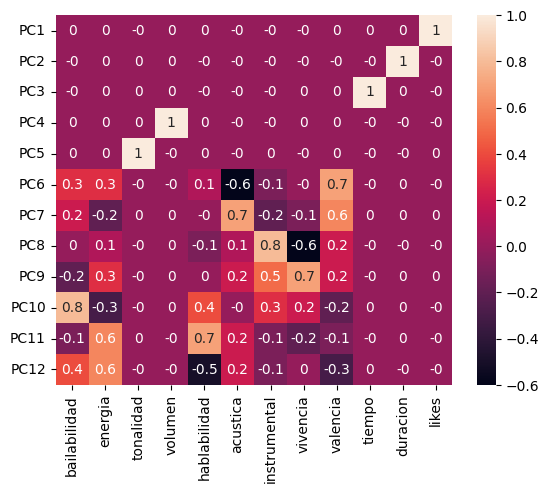

In [32]:
# Gráficos, nos ayudara a entender mejor la información
ax = sns.heatmap(componentes.round(1), annot=True)

In [34]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(3)*100)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
[99.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


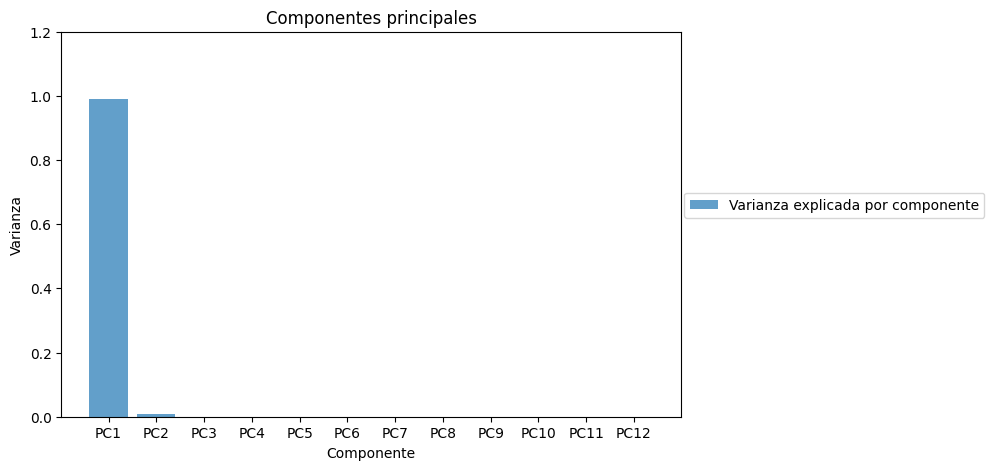

In [35]:
# Gráficos
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [39]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones = pd.DataFrame(modelo_pca.transform(df_limpio_2), index=df_limpio_2.index,columns=lista_componentes)
proyecciones.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,5795980.366,-27415.943,16.068,-1.030,0.830,0.306,-0.015,-0.256,0.295,0.198,-0.098,-0.051
1,654182.469,-41462.993,-26.814,3.531,2.814,0.250,0.066,0.137,-0.089,-0.106,-0.072,-0.064
2,-142777.937,-25180.906,-11.011,5.234,-4.257,0.072,-0.168,0.128,-0.032,-0.008,0.045,0.110
3,1363685.693,-8930.799,0.550,2.292,-3.228,0.070,-0.272,0.464,0.098,0.133,-0.109,-0.031
4,5772596.087,90902.509,45.889,-3.888,4.777,0.156,-0.141,-0.020,-0.151,0.044,0.075,-0.013
...,...,...,...,...,...,...,...,...,...,...,...,...
8736,-420144.619,70504.425,-30.583,3.138,1.786,-0.374,-0.499,0.044,-0.212,-0.048,-0.131,-0.164
8737,-140169.813,29852.897,-24.932,2.433,5.799,-0.289,0.176,0.049,-0.067,-0.053,0.117,0.157
8738,-212644.984,-10496.475,-29.082,2.686,-4.186,-0.142,0.116,0.074,-0.088,-0.064,0.066,0.075
8739,-383085.683,1429.647,-17.706,5.906,2.738,0.057,-0.128,-0.027,0.117,-0.084,-0.019,-0.055


In [40]:
#En este punto hicimos la transformación pero aún tenemos 12 variables, y como nuestro objetivo es simplificar
#el problema, debemos escoger con cuantas variables nos vamos a quedar. En este caso solo me voy a quedar con la primera, PC1(este valor explica toda la varianza)

proyecciones.drop(columns=['PC2', 'PC3','PC4', 'PC5','PC6', 'PC7','PC8', 'PC9','PC10', 'PC11','PC12'], inplace=True)


In [41]:
proyecciones.round(2)

,PC1
0,5795980.37
1,654182.47
2,-142777.94
3,1363685.69
4,5772596.09
...,...
8736,-420144.62
8737,-140169.81
8738,-212644.98
8739,-383085.68


In [42]:
# Agreguemos la columna de las hit? para poderla utilizar más adelante
proyecciones['Hit?'] =  df_limpio_1["Hit?"]# Esto solo funciona por que tienen el mismo index
proyecciones.round(2)


,PC1,Hit?
0,5795980.37,Hit
1,654182.47,No_hit
2,-142777.94,No_hit
3,1363685.69,Hit
4,5772596.09,Hit
...,...,...
8736,-420144.62,No_hit
8737,-140169.81,No_hit
8738,-212644.98,No_hit
8739,-383085.68,No_hit


<Axes: xlabel='Hit?', ylabel='PC1'>

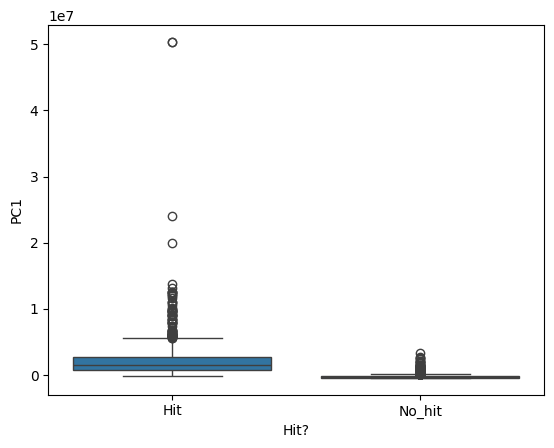

In [43]:
#Gráfico de cajas (boxplot)
#Un boxplot es útil para ver la distribución de PC1(likes) para cada una de las categorías de la variable Hit?.
#Este gráfico te mostrará la mediana, los cuartiles y los valores atípicos para PC1 según si el video es un "hit"(tiene media y mediana mas alta,
#lo cual era esperable) o "no_hit".

sns.boxplot(x='Hit?', y='PC1', data=proyecciones)

In [44]:
proyecciones['Hit?'].value_counts()


,count
Hit?,
No_hit,7866
Hit,875


In [ ]:
print("""MODELO PARTE 3: Modelo KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [46]:
#Datos
proyecciones_features=proyecciones[["PC1"]]
proyecciones_features.round(2)

,PC1
0,5795980.37
1,654182.47
2,-142777.94
3,1363685.69
4,5772596.09
...,...
8736,-420144.62
8737,-140169.81
8738,-212644.98
8739,-383085.68


In [47]:
#Variable a predecir
proyecciones_target=proyecciones[["Hit?"]]
proyecciones_target

,Hit?
0,Hit
1,No_hit
2,No_hit
3,Hit
4,Hit
...,...
8736,No_hit
8737,No_hit
8738,No_hit
8739,No_hit


In [48]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(proyecciones_features,proyecciones_target,test_size=0.2, random_state=2)
# Creamos un KNN
modelo = KNeighborsClassifier(n_neighbors=4)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [49]:
preds_train = modelo.predict(X_train)
preds_test = modelo.predict(X_test)

In [50]:
y_test

,Hit?
4905,No_hit
2274,No_hit
7587,No_hit
8263,No_hit
6196,No_hit
...,...
7615,No_hit
40,Hit
5881,No_hit
3869,No_hit


In [51]:
preds_test

array(['No_hit', 'No_hit', 'No_hit', ..., 'No_hit', 'No_hit', 'No_hit'],
      dtype=object)

In [52]:
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

         Hit       0.85      0.91      0.88       672
      No_hit       0.99      0.98      0.99      6320

    accuracy                           0.98      6992
   macro avg       0.92      0.94      0.93      6992
weighted avg       0.98      0.98      0.98      6992



In [53]:
print(metrics.classification_report(y_test, preds_test))

              precision    recall  f1-score   support

         Hit       0.86      0.85      0.86       203
      No_hit       0.98      0.98      0.98      1546

    accuracy                           0.97      1749
   macro avg       0.92      0.92      0.92      1749
weighted avg       0.97      0.97      0.97      1749



In [ ]:
#explicacion

In [93]:
print("""B) MODELO DE REGRESION:
Se intentara hacer un modelo de regresion solo con
Las variables "musicales" ( 'bailabilidad','energia','tonalidad','volumen','acustica'etc)
para predecir el numero de vistas en yotube.
En esta oportunidad se dejara de lado la variable like """)

B) MODELO DE REGRESION: 
Se intentara hacer un modelo de regresion solo con  
Las variables "musicales" ( 'bailabilidad','energia','tonalidad','volumen','acustica'etc) 
para predecir el numero de vistas en yotube.
En esta oportunidad se dejara de lado la variable like 


In [95]:
print("""MODELO PARTE 1: NORMALIZAR
Como hay muchas variables en muchas escalas diferentes, se van a normalizar para que cada variable tenga media 0 y desvio estandar 1"

#Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
#Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas""")


#Primero saco las variables que no voy a tomar en cuenta como albmun, cancion etc y las posibles variables a predecir ( vistas, reproducciones_spotify , like,hit?, duracion)
df_limpio_3= df_limpio_1[['bailabilidad','energia','tonalidad','volumen','hablabilidad','acustica','instrumental','vivencia','valencia','tiempo']]
df_limpio_3



MODELO PARTE 1: NORMALIZAR
Como hay muchas variables en muchas escalas diferentes, se van a normalizar para que cada variable tenga media 0 y desvio estandar 1"

#Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
#Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas


,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953
...,...,...,...,...,...,...,...,...,...,...
8736,0.344,0.458,7.0,-6.649,0.0285,0.003430,0.158000,0.0747,0.0647,87.959
8737,0.609,0.718,11.0,-7.177,0.0450,0.600000,0.000000,0.0820,0.4260,93.940
8738,0.602,0.681,1.0,-6.976,0.0517,0.468000,0.000000,0.0680,0.5050,89.923
8739,0.557,0.844,8.0,-3.632,0.0886,0.019000,0.000000,0.3150,0.6570,101.051


In [96]:
print("Estandarizar")
from sklearn.preprocessing import StandardScaler
#Estandarizar los datos
scaler = StandardScaler()
#los datos deben ser estandarizados ya que al tener las
#variables de entrada de diferente naturaleza, puede generar ruido.
df_estandarizado_regresion = scaler.fit_transform(df_limpio_3)
df_estandarizado_regresion

Estandarizar


array([[ 1.30567075,  0.38049733,  0.22363149, ...,  2.36340692,
         0.88076468,  0.65308303],
       [ 0.48765964,  0.3720602 ,  0.78728862, ..., -0.859622  ,
         1.19572453, -0.88695749],
       [ 0.59711183,  1.30014494, -1.18551131, ..., -0.46321276,
         0.01068809, -0.3740478 ],
       ...,
       [ 0.06137215,  0.27925172, -1.18551131, ..., -0.73620621,
        -0.17041383, -0.98239037],
       [-0.19785672,  0.96687814,  0.78728862, ...,  0.66857259,
         0.42800989, -0.60819126],
       [ 0.15930306,  0.8445397 ,  1.35094574, ...,  0.85625558,
         1.50674739, -0.98218861]])

In [97]:
print("""MODELO PARTE 3: PCA
Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas
Se pasara lo mismo que en el modelo de clasificacion?""")

# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

MODELO PARTE 3: PCA
Como tenemos muchas variables, la idea es reducir la cantidad pero reteniendo la mayor cantidad de informacion posible.
Al haber tantas variables es posible que muchas se correlacione mucho, al utilizar PCA estas nuevas variables no estarian correlacionadas
Se pasara lo mismo que en el modelo de clasificacion?


In [98]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=10)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(df_limpio_3)

PCA(n_components=10)

In [99]:
modelo_pca.components_

array([[-3.41535818e-04,  1.34365006e-03,  2.05762137e-03,
         2.81156273e-02, -3.14870225e-05, -1.32834996e-03,
        -7.28879830e-04,  5.39716085e-05,  9.57453743e-04,
         9.99599990e-01],
       [ 1.32495503e-02,  3.44094136e-02,  1.47698105e-02,
         9.97834803e-01,  1.11488904e-03, -3.37795065e-02,
        -2.34932012e-02,  3.67533747e-03,  1.56257307e-02,
        -2.82152564e-02],
       [ 1.47917014e-03,  8.16166415e-04,  9.99879242e-01,
        -1.49733148e-02,  2.40176607e-04, -2.36402279e-03,
         1.32416489e-03, -4.94845928e-04,  2.02667886e-03,
        -1.64171819e-03],
       [ 3.43580867e-01,  2.74571523e-01, -3.99121289e-03,
        -4.74791936e-02,  6.33779499e-02, -5.79206359e-01,
        -1.45971602e-01, -1.25229808e-02,  6.65831046e-01,
        -4.19246317e-04],
       [ 2.14293665e-01, -2.01289079e-01,  9.75914316e-04,
         1.45707428e-02, -9.06245859e-03,  7.33944414e-01,
        -2.47312897e-01, -4.96490284e-02,  5.57640035e-01,
         1.

In [100]:
modelo_pca.explained_variance_ratio_[0]

0.9548375493192371

In [102]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']
componentes_regresion = pd.DataFrame(data=modelo_pca.components_, columns = df_limpio_3.columns, index=lista_componentes)
componentes_regresion.round(3)

#PC1 parece ser que es igual a duracion
#PC2 parece ser que es igual a tiempo
#PC3 parece ser que es igual a volumen
#PC4 es casi igual a tonalidad

,bailabilidad,energia,tonalidad,volumen,hablabilidad,acustica,instrumental,vivencia,valencia,tiempo
PC1,-0.000,0.001,0.002,0.028,-0.000,-0.001,-0.001,0.000,0.001,1.000
PC2,0.013,0.034,0.015,0.998,0.001,-0.034,-0.023,0.004,0.016,-0.028
PC3,0.001,0.001,1.000,-0.015,0.000,-0.002,0.001,-0.000,0.002,-0.002
PC4,0.344,0.275,-0.004,-0.047,0.063,-0.579,-0.146,-0.013,0.666,-0.000
PC5,0.214,-0.201,0.001,0.015,-0.009,0.734,-0.247,-0.050,0.558,0.000
PC6,0.033,0.088,-0.001,0.016,-0.130,0.082,0.740,-0.622,0.182,-0.000
PC7,-0.190,0.312,-0.000,0.003,0.029,0.175,0.505,0.722,0.244,-0.000
PC8,0.771,-0.306,-0.001,0.010,0.356,-0.008,0.293,0.200,-0.243,0.001
PC9,-0.025,0.603,0.000,-0.013,0.708,0.229,-0.122,-0.219,-0.136,-0.000
PC10,-0.452,-0.566,0.000,0.017,0.592,-0.187,0.119,-0.029,0.275,-0.000


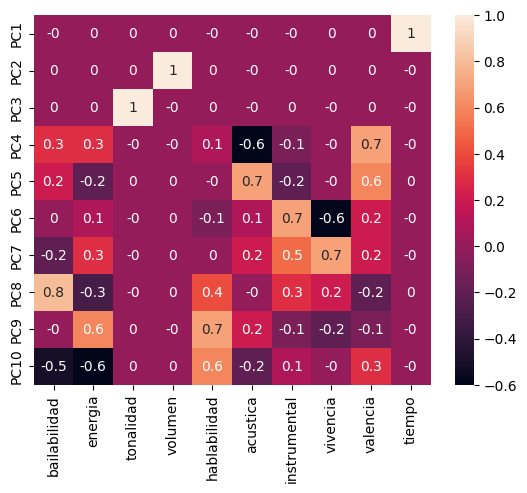

In [103]:
# Gráficos, nos ayudara a entender mejor la información
ax = sns.heatmap(componentes_regresion.round(1), annot=True)

In [104]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(3)*100)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
[95.5  3.1  1.4  0.   0.   0.   0.   0.   0.   0. ]


In [75]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones_regresion = pd.DataFrame(modelo_pca.transform(df_limpio_3), index=df_limpio_3.index,columns=lista_componentes)
proyecciones_regresion.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-17924.679,19.406,1.634,0.736,0.327,-0.039,-0.259,0.254,0.226,-0.099,0.031
1,-40391.678,-26.432,3.849,2.806,0.251,0.065,0.141,-0.089,-0.102,-0.078,0.059
2,-25414.678,-11.088,5.179,-4.250,0.073,-0.166,0.129,-0.026,-0.010,0.053,-0.104
3,-6697.679,1.337,2.924,-3.248,0.077,-0.280,0.460,0.102,0.143,-0.110,0.024
4,100355.321,49.201,-1.264,4.682,0.179,-0.169,-0.012,-0.184,0.067,0.077,0.009
...,...,...,...,...,...,...,...,...,...,...,...
8736,69816.322,-30.830,2.955,1.794,-0.370,-0.502,0.045,-0.209,-0.048,-0.145,0.153
8737,29623.322,-25.014,2.375,5.802,-0.292,0.173,0.053,-0.063,-0.057,0.130,-0.146
8738,-10844.678,-29.202,2.608,-4.181,-0.145,0.115,0.078,-0.083,-0.067,0.071,-0.068
8739,802.322,-17.923,5.737,2.749,0.057,-0.124,-0.032,0.119,-0.085,-0.026,0.055


In [76]:
#En este punto hicimos la transformación pero aún tenemos 12 variables, y como nuestro objetivo es simplificar
#el problema, debemos escoger con cuantas variables nos vamos a quedar. En este caso solo me voy a quedar con la primera, PC1(este valor explica toda la varianza)

proyecciones_regresion.drop(columns=['PC2', 'PC3','PC4', 'PC5','PC6', 'PC7','PC8', 'PC9','PC10', 'PC11'], inplace=True)

In [77]:
proyecciones_regresion.round(2)

,PC1
0,-17924.68
1,-40391.68
2,-25414.68
3,-6697.68
4,100355.32
...,...
8736,69816.32
8737,29623.32
8738,-10844.68
8739,802.32


In [79]:
# Agreguemos la columna de las vistas para poderla utilizar más adelante
proyecciones_regresion['vistas'] =  df_limpio_1["vistas"]# Esto solo funciona por que tienen el mismo index
proyecciones_regresion.round(2)

,PC1,vistas
0,-17924.68,693555221.0
1,-40391.68,72011645.0
2,-25414.68,8435055.0
3,-6697.68,211754952.0
4,100355.32,618480958.0
...,...,...
8736,69816.32,127870.0
8737,29623.32,62255620.0
8738,-10844.68,54247539.0
8739,802.32,5699994.0


In [80]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

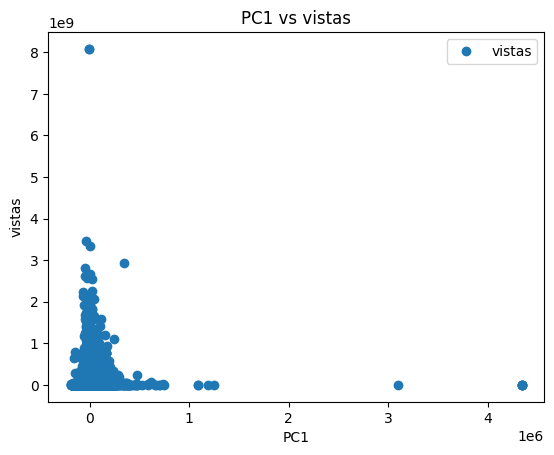

In [82]:
#Ploteamos el dataset
proyecciones_regresion.plot(x='PC1', y='vistas', style="o")
plt.title('PC1 vs vistas')
plt.xlabel('PC1')
plt.ylabel('vistas')
plt.show()

In [84]:
#Feature/variable independiente
X = proyecciones_regresion[['PC1']]

#Target/variable dependiente (Variable a predecir)
y = proyecciones_regresion[['vistas']]

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

# nos podemos quedar con el 70% para entrenar y 30% para testear

In [86]:
#Entrenamos el modelo con los datos
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [87]:
# Obtener la pendiente
slope = regressor.coef_

# Obtener los coeficientes de intercepción
intercept = regressor.intercept_

print("este es el valor de la pendiente:", slope.round(1))
print("este es el valor del intercepto:", intercept.round(1))

este es el valor de la pendiente: [[47.2]]
este es el valor del intercepto: [73182986.6]


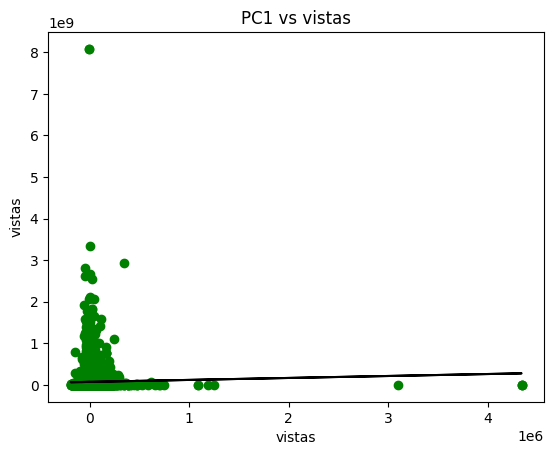

In [88]:
#Visualización de los datos de entrenamiento

viz_train = plt
viz_train.scatter(X_train, y_train, color = 'g')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('PC1 vs vistas')
viz_train.xlabel('vistas')
viz_train.ylabel('vistas')
viz_train.show()

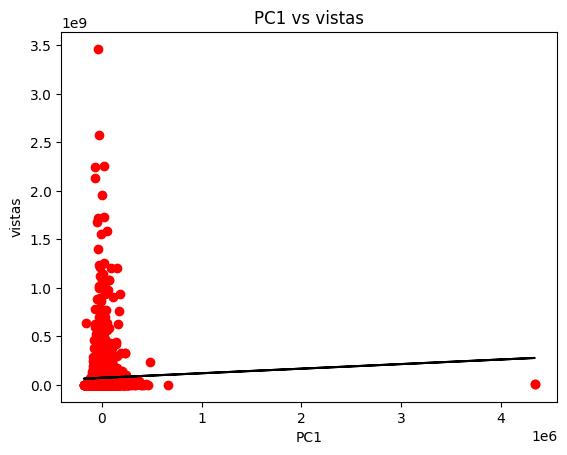

In [90]:
#Visualización de los datos de prueba
viz_test = plt
viz_test.scatter(X_test, y_test, color = 'red')
viz_test.plot(X_test, regressor.predict(X_test), color = 'black')
viz_test.title('PC1 vs vistas')
viz_test.xlabel('PC1')
viz_test.ylabel('vistas')
viz_test.show()

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Mostrar los resultados
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

R² Score: -0.000
Mean Absolute Error (MAE): 91470185.117
Mean Squared Error (MSE): 38550397799235416.000
